In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Carregar o dataset

df_student = pd.read_csv('./dataset/Student_Performance.csv')

In [75]:
# Visualizar os dados
df_student.head(5)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [7]:
df_student.info()
df_student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [73]:
df_student['Extracurricular Activities'] = df_student['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

In [74]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


### EDA

<Axes: >

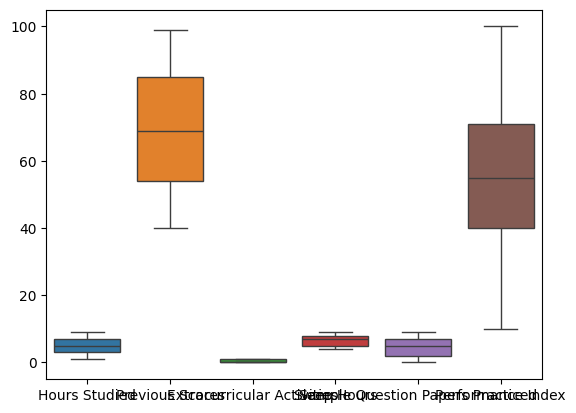

In [76]:
#verificar se tem outliers

sns.boxplot(data=df_student)

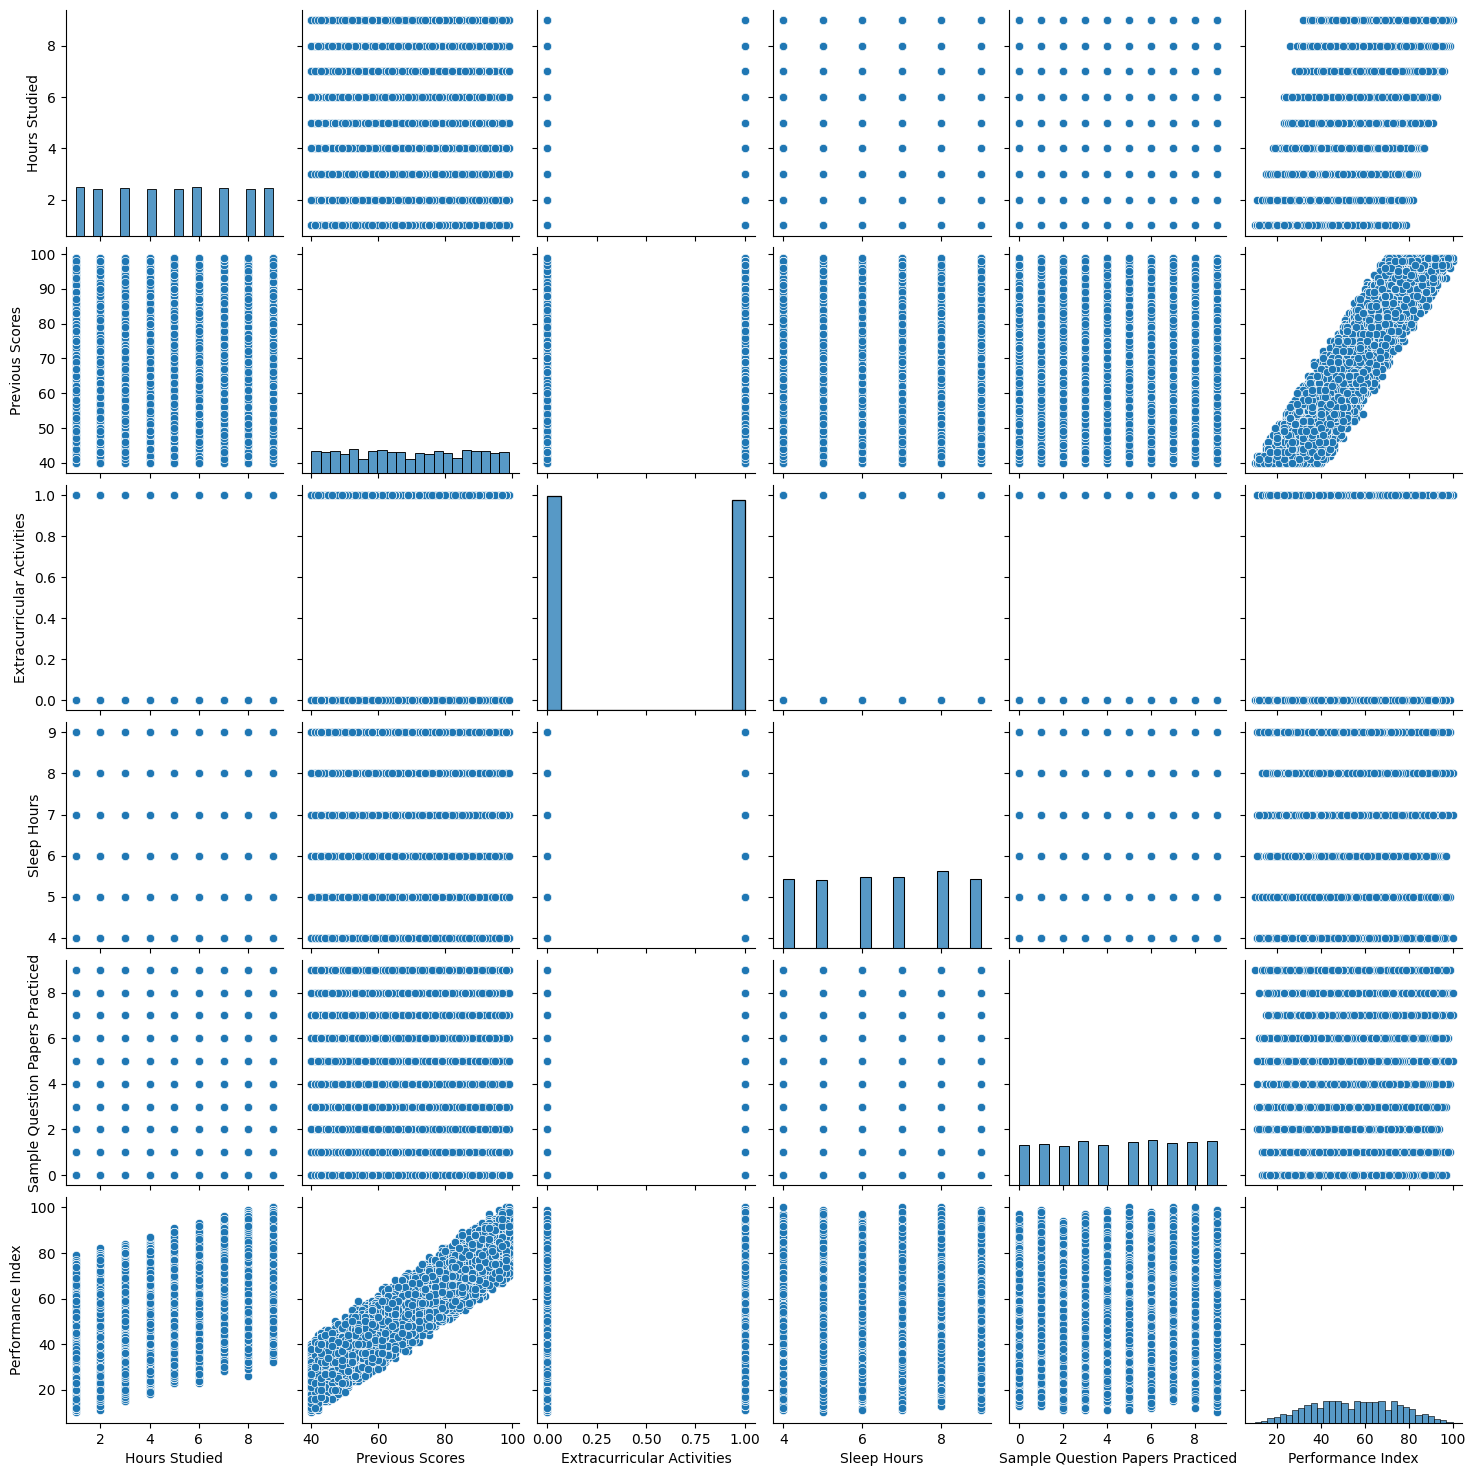

In [77]:
sns.pairplot(df_student)

<Axes: xlabel='Hours Studied'>

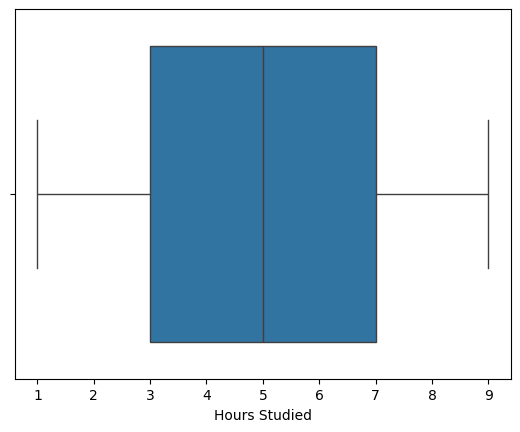

In [10]:
sns.boxplot(data=df_student, x='Hours Studied')

In [78]:
df_student.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: >

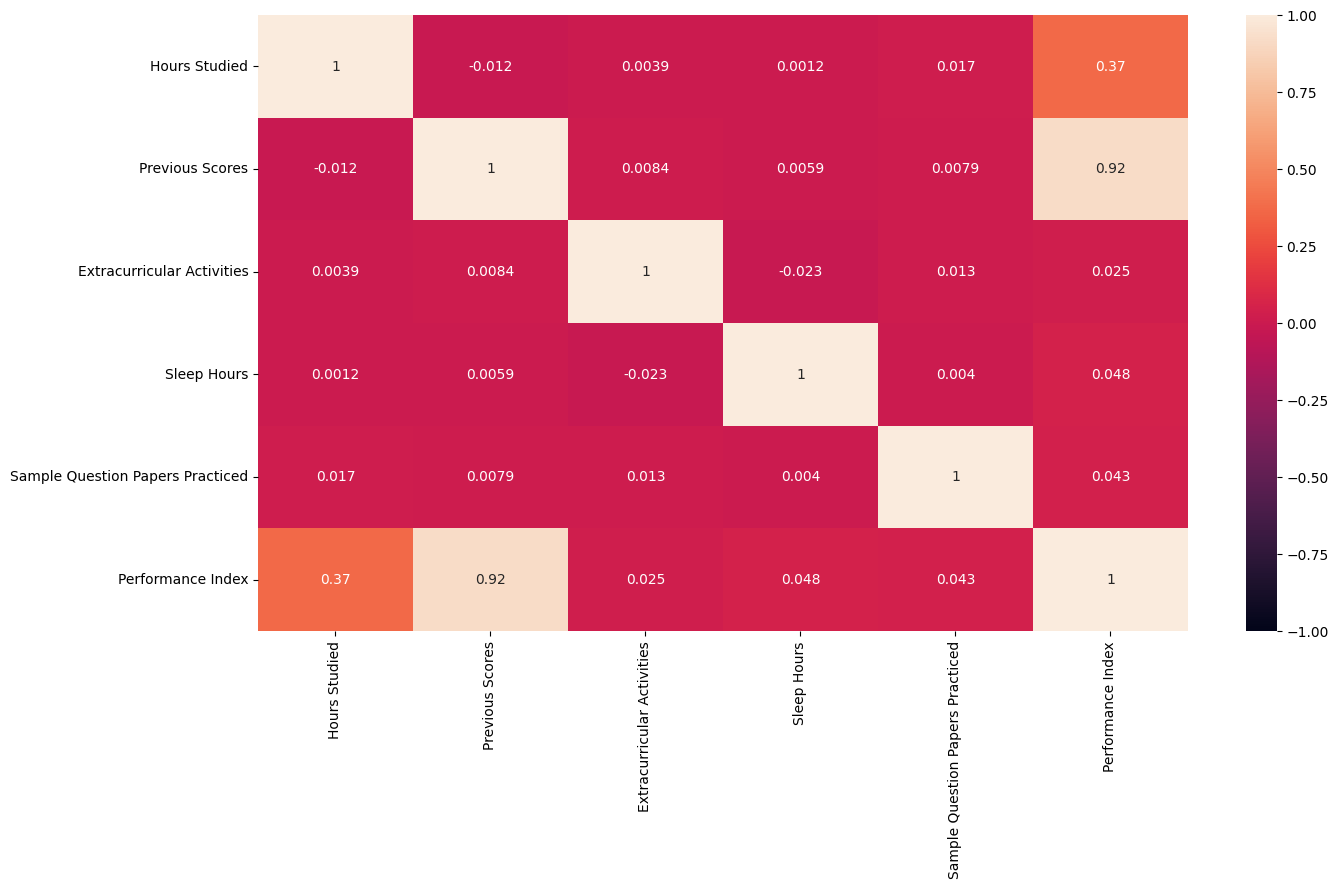

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(df_student.corr(), vmin=-1, vmax=1, annot=True )

<Axes: >

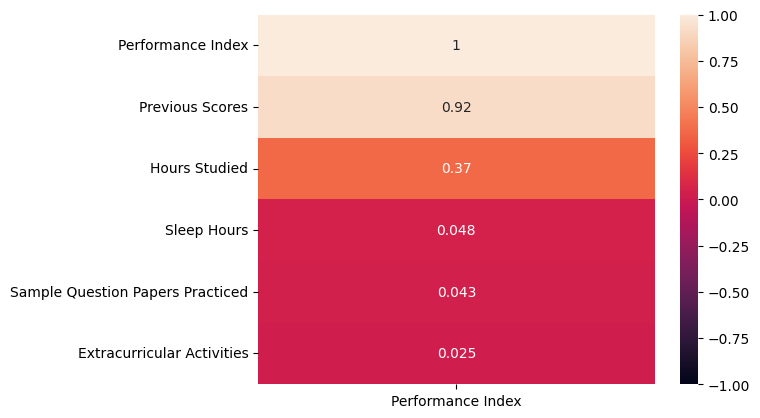

In [81]:
# fazer em formato de rank

sns.heatmap(df_student.corr()[['Performance Index']].sort_values(by='Performance Index', ascending=False), vmin=-1, vmax=1, annot=True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [84]:
X = df_student.drop(columns=['Performance Index'])
y = df_student['Performance Index']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.4, random_state=42)

In [86]:
model_student = LinearRegression().fit(X_train, y_train)

In [87]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [88]:
# Fazer predições
y_pred = model_student.predict(X_test)

In [89]:
# Calcular R2 score
r2_score(y_test,y_pred)

0.9887593966422212

In [90]:
# Caclular MAE

mean_absolute_error(y_test, y_pred)

1.6216160712518268

In [91]:
# Calcular MSE
mean_squared_error(y_test, y_pred)

4.167517121874378

In [92]:
#Calcular metrica RMSE (square root mean squared error)
#RMSE = media  (raiz (y_test - y_pred)^2)
#É uma metrica mais facil de interpretar
# mas ainda sim continua mais sensivel aos outliers
root_mean_squared_error(y_test,y_pred)

2.041449759821284

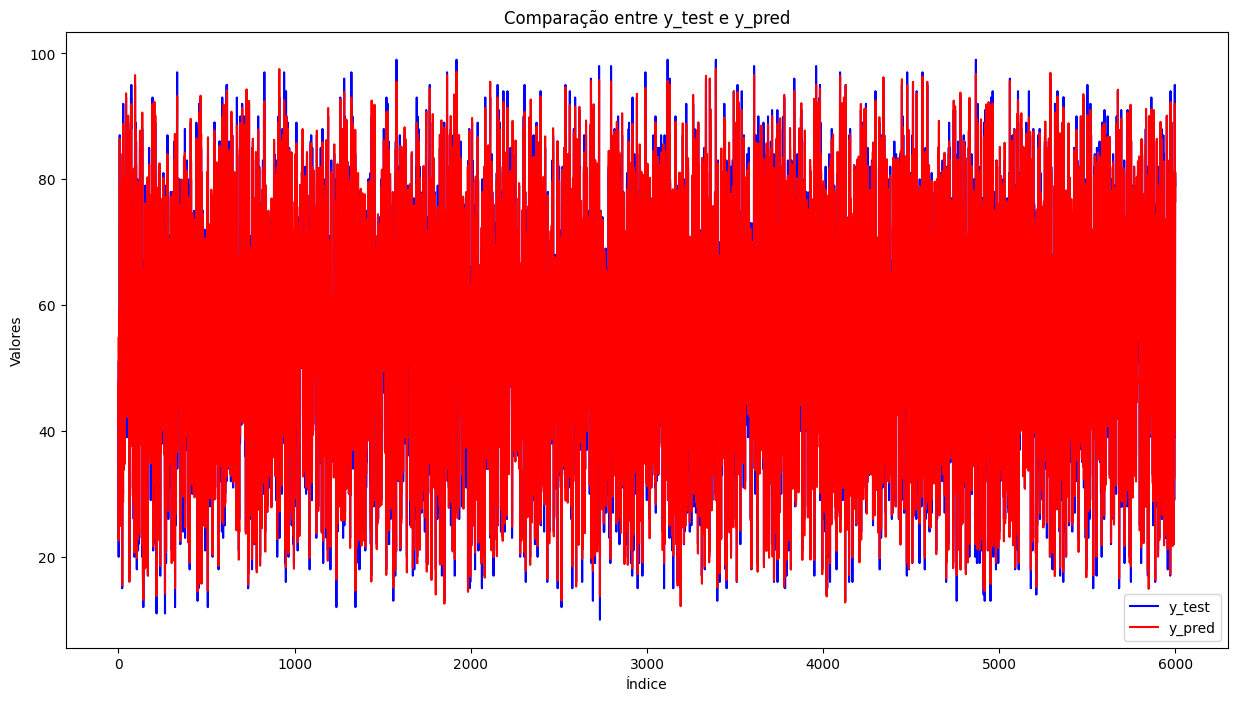

In [93]:
x_axis = range(len(y_test))
plt.figure(figsize=(15, 8))
plt.plot(x_axis, y_test, label='y_test', color='blue')
plt.plot(x_axis, y_pred, label='y_pred', color='red')
plt.title('Comparação entre y_test e y_pred')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.show()

<Axes: >

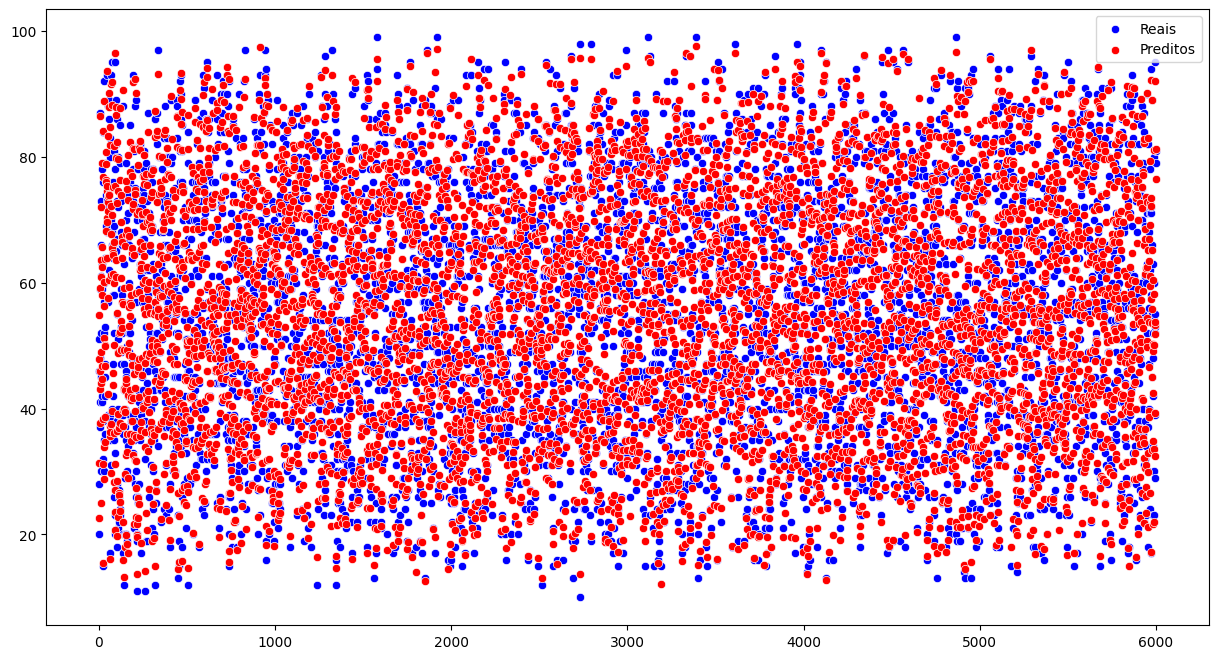

In [94]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=x_axis, y=y_test.values.reshape(-1), color='blue', label='Reais')

sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Preditos')

### Analise de residuos

In [95]:
# Calcular residuos

residuos = y_test - y_pred

In [96]:
# Transformar residuos na escala padrao
# (X - media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

array([-1.82362572, -1.23169184, -0.914525  , ...,  0.14264144,
       -0.08490962,  1.26731652], shape=(6000,))

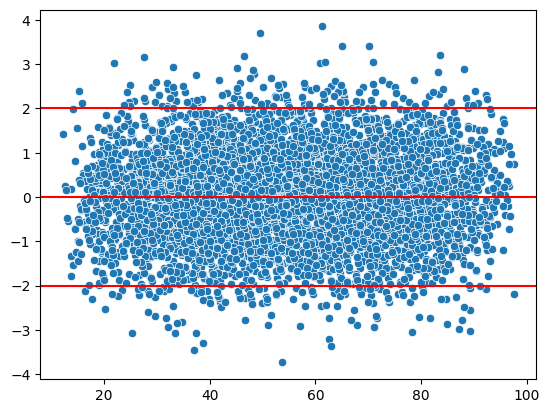

In [97]:
# Verificar linearidade dos residuos: Valores estao entre -2 e 2 (escala padrao)
# Verificar homocedasticidade dos residuos: Valores em torno da reta

sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0, color='red')
plt.axhline(y=-2, color='red')
plt.axhline(y=2, color='red')

In [98]:
# Checar se residuos seguem uma dsitribuição normal
#QQ plot 
import pingouin as pg

Text(0, 0.5, 'residuos na escala padrao')

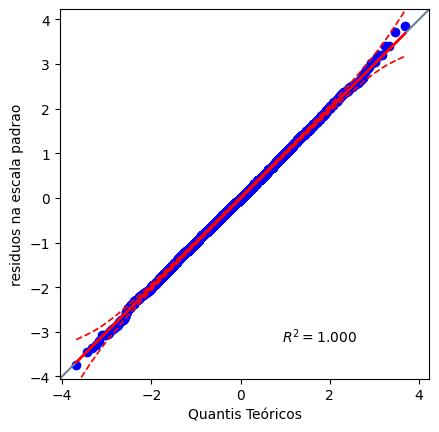

In [99]:
pg.qqplot(residuos_std, dist='norm', confidence=0.95 )
plt.xlabel('Quantis Teóricos')
plt.ylabel('residuos na escala padrao')

In [100]:
# Teste de normalidade de Shapiro wilk
from scipy.stats import shapiro, kstest,anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stast_shapiro, p_value_shapiro = shapiro(residuos)
print(stast_shapiro, p_value_shapiro)

0.9997937273468122 0.8660820017193278


c:\Users\dccas\.virtualenvs\more_training_multiple_regression_linear-xFjw8Aeg\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


In [101]:
# Teste de Kolmogorov-Smirnov

stast_ks, p_value_ks = kstest(residuos, 'norm')

print(stast_ks, p_value_ks)

0.17682347027743567 1.436714901680731e-164


In [102]:
# Teste de Lilliefors

stast_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')

print(stast_ll, p_value_ll)

0.009703352570518464 0.19626222499531376


In [41]:
# Teste de Anderson-darling
# se valor da estatistica for mairo que o valor critico rejeitamos H0

stast_and, critical_and, significance_and = anderson(residuos, dist='norm')

In [42]:
critical_and

array([0.576, 0.656, 0.786, 0.917, 1.091])

In [43]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [44]:
stast_and

np.float64(0.37495575377215573)

In [103]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [46]:
df_student.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [105]:
#Predição individual

predicao_individual = {
  'Hours Studied' : 8,
  'Previous Scores': 87,
  'Extracurricular Activities': 1,
  'Sleep Hours': 7,
  'Sample Question Papers Practiced': 2,
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [106]:
sample_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
1,8,87,1,7,2


In [107]:
# Predição

model_student.predict(sample_df)

array([81.75131855])

In [108]:
import joblib

In [110]:
# Salvar Modelo
joblib.dump(model_student, './modelo_perfomance.pkl')

['./modelo_perfomance.pkl']